# customization

---



In [0]:
import tensorflow as tf
tf.test.gpu_device_name()
# подключить GPU: Runtime -> Change runtime type -> Hardware accelerator: GPU
# вывод: '/device:GPU:0'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# монтируем гугл диск

In [0]:
# !cp /content/gdrive/'My Drive'/run.py .
# !cp /content/gdrive/'My Drive'/detection.py .
# !cp /content/gdrive/'My Drive'/facepoints_model.hdf5 .
!cp /content/gdrive/'My Drive'/facepoint/train_labels.npy .
!cp /content/gdrive/'My Drive'/facepoint/train_dataset_rgb.npy .
!cp /content/gdrive/'My Drive'/facepoint/train_dataset_grayscale.npy .
# !cp /content/gdrive/'My Drive'/facepoint/test_labels.npy .
# !cp /content/gdrive/'My Drive'/facepoint/test_dataset_rgb.npy .
# !cp /content/gdrive/'My Drive'/facepoint/test_dataset_grayscale.npy .
# !cp /content/gdrive/'My Drive'/public_tests.zip .
# !unzip -q public_tests.zip -d tests
# копируем и разархивируем файлы в colab
!ls

# models

In [0]:
# task description
# 0
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
          input_shape=IMAGE_SIZE))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(NUMBER_OF_FACE_POINTS * 2))

In [0]:
# 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu',
                 kernel_regularizer=l2(0.001), input_shape=IMAGE_SIZE))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                 kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                 kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=NUMBER_OF_FACE_POINTS * 2, kernel_size=(3, 3),
                 activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(NUMBER_OF_FACE_POINTS * 2))

In [0]:
# improvement of the previous version
# 23
# Total params: 1,162,496
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1),
                 padding='same', activation='relu',
                 kernel_regularizer=l2(0.01), input_shape=IMAGE_SIZE))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1),
                 padding='same', activation='relu',
                 kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1),
                 padding='same', activation='relu',
                 kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=NUMBER_OF_FACE_POINTS * 2, kernel_size=(3, 3),
                 strides=(1, 1), padding='same', activation='relu',
                 kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(NUMBER_OF_FACE_POINTS * 2))

In [0]:
# 15
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
          input_shape=IMAGE_SIZE))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(NUMBER_OF_FACE_POINTS * 2))

In [0]:
# 13
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 kernel_regularizer=l2(0.0001), input_shape=IMAGE_SIZE))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.00001)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.00001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.00001)))
model.add(Dense(NUMBER_OF_FACE_POINTS * 2))

In [0]:
# http://flothesof.github.io/convnet-face-keypoint-detection.html
# 18
# Total params: 210,290
model = Sequential()

model.add(BatchNormalization(input_shape=IMAGE_SIZE))
model.add(Conv2D(filters=24, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=48, kernel_size=(5, 5), activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(NUMBER_OF_FACE_POINTS * 2))

In [0]:
# https://www.kaggle.com/karanjakhar/facial-keypoint-detection
# 19, 22
# Total params: 7,267,644
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 use_bias=False, input_shape=IMAGE_SIZE))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3),padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same',
                 use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(NUMBER_OF_FACE_POINTS * 2))

In [0]:
# https://www.kaggle.com/aparajit0511/facial-keypoint-detection-udacity
# 21, 24
# Total params: 783,232
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(2, 2), padding="same",
                 activation="relu", input_shape=IMAGE_SIZE))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(500, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(NUMBER_OF_FACE_POINTS * 2))

In [0]:
# 25
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(2, 2), padding='same',
                 kernel_initializer='he_normal', input_shape=IMAGE_SIZE))
model.add(Dropout(0.05))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(5, 5),
                kernel_initializer='he_normal'))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(5, 5),
                kernel_initializer='he_normal'))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3),
                kernel_initializer='he_normal'))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(NUMBER_OF_FACE_POINTS * 2))

In [0]:
# https://www.kaggle.com/gakshaygupta/real-time-cnn-architecture
# None
# Total params: 93,516
model = Sequential()
# base
model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1),
                 kernel_regularizer=l2(0.01), use_bias=False,
                 input_shape=IMAGE_SIZE))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1),
                 kernel_regularizer=l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
# module 1
model.add(SeparableConv2D(filters=16, kernel_size=(3, 3), padding='same',
                          kernel_regularizer=l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(filters=16, kernel_size=(3, 3), padding='same',
                          kernel_regularizer=l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(filters=16, kernel_size=(1, 1), strides=(2, 2),
                 padding='same', use_bias=False))
model.add(BatchNormalization())
# module 2
model.add(SeparableConv2D(filters=32, kernel_size=(3, 3), padding='same',
                          kernel_regularizer=l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(filters=32, kernel_size=(3, 3), padding='same',
                          kernel_regularizer=l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(1, 1), strides=(2, 2),
                 padding='same', use_bias=False))
model.add(BatchNormalization())
# module 3
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                          kernel_regularizer=l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                          kernel_regularizer=l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(Conv2D(filters=64, kernel_size=(1, 1), strides=(2, 2),
                 padding='same', use_bias=False))
model.add(BatchNormalization())
# module 4
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same',
                          kernel_regularizer=l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same',
                          kernel_regularizer=l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(Conv2D(filters=128, kernel_size=(1, 1), strides=(2, 2),
                 padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Conv2D(filters=NUMBER_OF_FACE_POINTS * 2,
                 kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())

Dense(NUMBER_OF_FACE_POINTS * 2)

In [0]:
# Popov.modern
# 26
# Total params: 1,995,548
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), # kernel_regularizer=l2(0.001),
                 kernel_initializer='he_normal', input_shape=IMAGE_SIZE))
model.add(BatchNormalization())
model.add(ELU())
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), # kernel_regularizer=l2(0.001),
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(ELU())
model.add(Conv2D(filters=128, kernel_size=(3, 3), # kernel_regularizer=l2(0.001),
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(ELU())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), # kernel_regularizer=l2(0.001),
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(ELU())
model.add(Conv2D(filters=256, kernel_size=(3, 3), # kernel_regularizer=l2(0.001),
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(ELU())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=512))
# model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(ELU())

model.add(Dense(units=512))
# model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(ELU())

model.add(Dense(NUMBER_OF_FACE_POINTS * 2))


In [0]:
# Sait.modern
# Total params: 4,760,380
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform',
                 input_shape=IMAGE_SIZE))
model.add((Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add((MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.15))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.15))

model.add(Dense(NUMBER_OF_FACE_POINTS * 2, activation='relu', kernel_initializer='he_uniform'))

# DETECTION

---


### imports

In [0]:
# to imporve in next cell: "cannot import name 'KeypointParams'""
!pip install -U git+https://github.com/albu/albumentations

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import (Conv2D, Flatten, Dense, MaxPooling2D,
                                     Dropout, BatchNormalization, ReLU, ELU)
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from albumentations import ShiftScaleRotate, Compose, KeypointParams
import matplotlib.pyplot as plt
from itertools import cycle
from random import random
from time import time
import numpy as np

### global

In [0]:
MODEL_NAME = '#33_facepoints_model.hdf5'
PATH_SAVE = './gdrive/My Drive/facepoint/33/#33_facepoints_model.{epoch:03d}-{val_loss:.3f}.hdf5'
IMAGE_SIZE = (100, 100, 3)
NUMBER_OF_FACE_POINTS = 14
FIGURE_SIZE = (20, 8)
BATCH_SIZE = 128
EPOCHS = 100

### statistic

In [0]:
def save_statistic(model_history):
    N = np.arange(len(model_history.epoch))

    plt.style.use('ggplot')
    fig, axes = plt.subplots(figsize=FIGURE_SIZE)
    axes.plot(N, model_history.history["loss"], label="train_loss")
    axes.plot(N, model_history.history["val_loss"], label="val_loss")
    # axes.semilogy(N, model_history.history["acc"], label="train_acc")
    # axes.semilogy(N, model_history.history["val_acc"], label="val_acc")
    axes.set_title("Training Loss(MSE) and Accuracy")
    axes.set_ylabel("Loss/Accuracy")
    axes.set_xlabel("Epoch #")
    axes.set_ylim([0, 10])
    axes.legend()

    fig.savefig(fname='history.png')

### model

In [0]:
def model_CNN_architecture():    
    model = Sequential()

    model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform',
                     input_shape=IMAGE_SIZE))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D())

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D())

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D())

    model.add(Flatten())

    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.15))

    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.15))

    model.add(Dense(NUMBER_OF_FACE_POINTS * 2, activation='relu', kernel_initializer='he_uniform'))

    model.summary()
    # plot_model(model, to_file='./model.png', show_shapes=True)

    return model

### datagen

In [0]:
class DataGen(object):
    def __init__(self, X, y, n_points=NUMBER_OF_FACE_POINTS,
                 flip=True, rotate=True, shift=True, scale=True,
                 rotate_limit=15, shift_limit=0.06, scale_limit=0.06):
        self.X = X
        self.y = y
        self.n_points = n_points
        self.transform = {'flip': flip, 'rotate': rotate,
                          'shift': shift, 'scale': scale}
        self.limit = {'rotate': rotate_limit, 'shift': shift_limit,
                      'scale': scale_limit}

    def generate_data(self):
        yield from cycle(zip(self.X, self.y))

    def create_transformer(self, image, points):
        return Compose([ShiftScaleRotate(shift_limit=self.limit['shift'] if self.transform['shift'] else 0,
                                         scale_limit=self.limit['scale'] if self.transform['scale'] else 0,
                                         rotate_limit=self.limit['rotate'] if self.transform['rotate'] else 0,
                                         interpolation=1,
                                         border_mode=0,
                                         p=14 / 15)],
                       keypoint_params=KeypointParams(format='xy'),
                       p=1
                       )(image=image, keypoints=points)

    def flow(self, batch_size=100):
        X_batch = np.empty((batch_size,) + self.X.shape[1:])
        y_batch = np.empty((batch_size,) + self.y.shape[1:])
        fliplr_coord = [6, 7, 4, 5, 2, 3, 0, 1, 18, 19, 16, 17, 14, 15,
                        12, 13, 10, 11, 8, 9, 20, 21, 26, 27, 24, 25, 22, 23]
        data = self.generate_data()

        while True:
            i = 0
            while i < batch_size:
                X, y = next(data)
                if np.min(y) <= 0 or np.max(y) >= max(X.shape[:2]):
                    continue
                transformed = self.create_transformer(X, y.reshape(self.n_points, 2))
                X, y = transformed['image'], np.array(transformed['keypoints']).ravel()
                if y.size < self.n_points * 2:
                    continue
                if self.transform['flip'] and random() < 1/2:
                    X = np.fliplr(X)
                    y[0::2] = X.shape[1] - y[0::2]
                    y = y[fliplr_coord]
                
                # self.visualize(X, y)
                X_batch[i, ...], y_batch[i, ...] = X, y
                i += 1

            yield (X_batch, y_batch)

    def visualize(self, image, points):
        plt.figure(figsize=FIGURE_SIZE)
        plt.imshow(np.squeeze(image), cmap='gray')
        plt.axis('off')
        for x in range(self.n_points):
            plt.scatter(points[2*x], points[2*x+1], s=256, marker='$' + str(x) + '$',
                        edgecolors='face', color='r')
        plt.show()
        plt.close()

### train

In [0]:
def train_detector(X, y, saved_model=None, initial_epoch=0, fast_train=False):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)
    epochs = 1 if fast_train else EPOCHS

    print('[MODEL] Training ...')
    start_time = time()
    if saved_model is None:
        model = model_CNN_architecture()
        model.compile(loss=mean_squared_error,
                      optimizer=Adam(learning_rate=0.001),
                      # metrics=['accuracy']
                     )
    else:
        model = saved_model

    checkpointer = ModelCheckpoint(filepath=PATH_SAVE, verbose=1, save_best_only=True)
    # reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=15,
    #                              verbose=1, mode='min', min_lr=0.0001)
    # earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=epochs/3)
    # tensorboard = TensorBoard(log_dir='./logs', write_graph=True)
    history = model.fit_generator(DataGen(X_train, y_train).flow(batch_size=BATCH_SIZE),
                                  steps_per_epoch=100,
                                  epochs=EPOCHS + initial_epoch,
                                  verbose=1,
                                  callbacks=[checkpointer],
                                  validation_data=(X_valid, y_valid),
                                  initial_epoch=initial_epoch)
    
    print('time:', time() - start_time)

    save_statistic(history)
    save_model(model, 'end_of_fit.hdf5')

### data

In [0]:
print('[DATA] Loading ...')
start_time = time()
X, y = np.load('train_dataset_rgb.npy'), np.load('train_labels.npy')
print('time:', time() - start_time)

[DATA] Loading ...
time: 0.22482538223266602


[MODEL] Training ...
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 96, 96, 32)        2432      
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 94, 94, 32)        9248      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 43, 43, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (Non

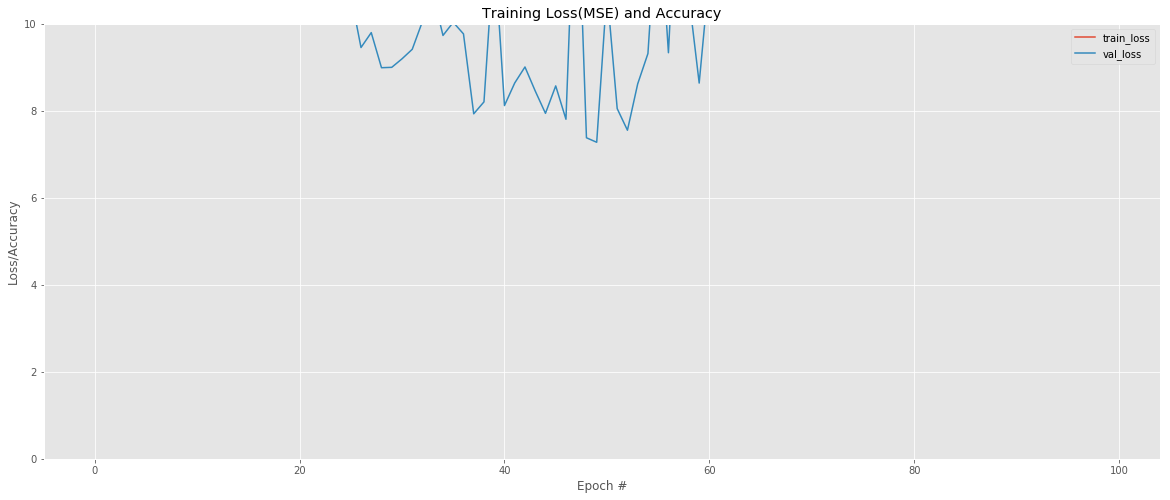

In [0]:
train_detector(X, y)

In [0]:
matexp = np.mean(X, axis=0)
variance = np.std(X, axis=0)

[MODEL] Training ...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 96, 96, 32)        2432      
_________________________________________________________________
batch_normalization_19 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
elu_63 (ELU)                 (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
elu_64 (ELU)                 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (Non

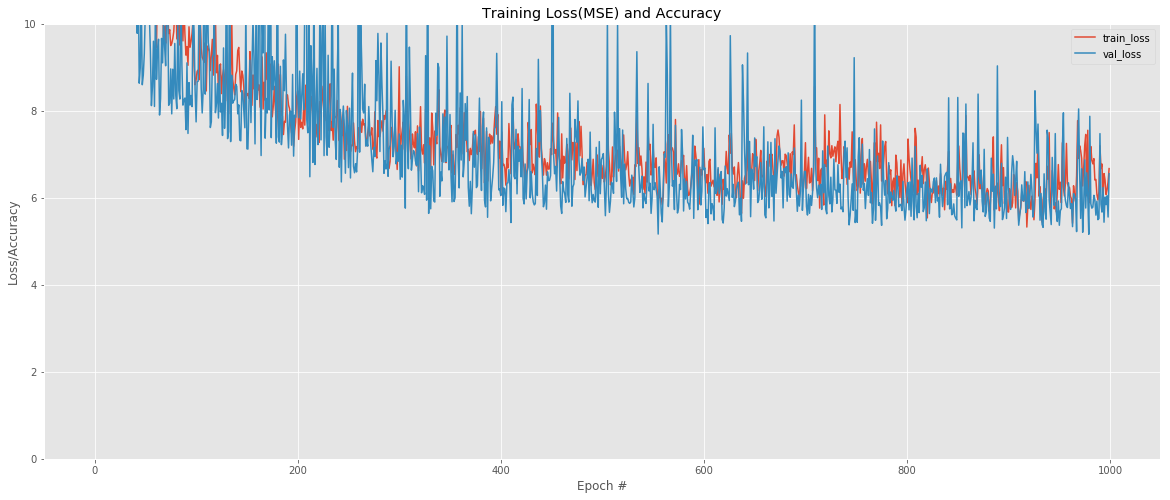

In [0]:
# simple start
X_norm = (X - matexp) / variance
train_detector(X_norm, y)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[MODEL] Training ...
Epoch 1001/1500
Epoch 1/1500
1200/100 - 1s - loss: 6.1288

Epoch 01001: val_loss improved from inf to 6.19979, saving model to ./gdrive/My Drive/facepoint/32/#32_facepoints_model.1001-6.200.hdf5
100/100 - 19s - loss: 6.6514 - val_loss: 6.1998
Epoch 1002/1500
Epoch 1/1500
1200/100 - 0s - loss: 4.8834

Epoch 01002: val_loss improved from 6.19979 to 4.84479, saving model to ./gdrive/My Drive/facepoint/32/#32_facepoints_model.1002-4.845.hdf5
100/100 - 10s - loss: 6.2999 - val_loss: 4.8448
Epoch 1003/1500
E

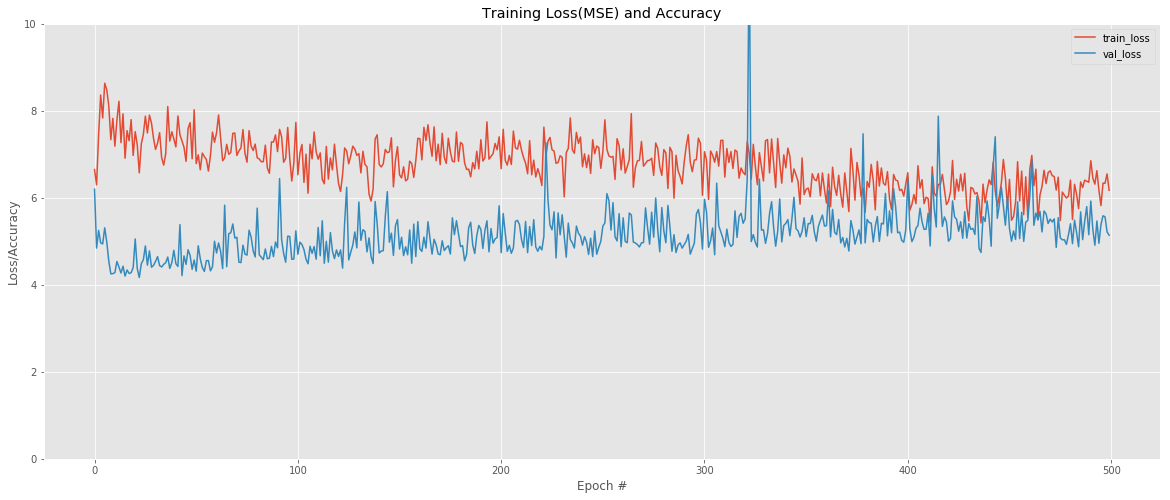

In [0]:
model = load_model('./gdrive/My Drive/facepoint/32/#32_facepoints_model.980-5.163.hdf5')
train_detector(X, y, initial_epoch=1000, saved_model=model)

In [0]:
model = load_model('./gdrive/My Drive/facepoint/32/#32_facepoints_model.1023-4.169.hdf5')
train_detector(X, y, initial_epoch=1500, saved_model=model)

[MODEL] Training ...
Epoch 1501/3000
Epoch 1/3000
1200/100 - 1s - loss: 7.4544

Epoch 01501: val_loss improved from inf to 6.99328, saving model to ./gdrive/My Drive/facepoint/32/#32_facepoints_model.1501-6.993.hdf5
100/100 - 48s - loss: 7.5906 - val_loss: 6.9933
Epoch 1502/3000
Epoch 1/3000
1200/100 - 0s - loss: 6.5824

Epoch 01502: val_loss improved from 6.99328 to 6.38744, saving model to ./gdrive/My Drive/facepoint/32/#32_facepoints_model.1502-6.387.hdf5
100/100 - 35s - loss: 7.8447 - val_loss: 6.3874
Epoch 1503/3000
Epoch 1/3000
1200/100 - 0s - loss: 7.7117

Epoch 01503: val_loss did not improve from 6.38744
100/100 - 38s - loss: 8.9811 - val_loss: 7.4813
Epoch 1504/3000
Epoch 1/3000
1200/100 - 0s - loss: 6.4806

Epoch 01504: val_loss improved from 6.38744 to 6.19586, saving model to ./gdrive/My Drive/facepoint/32/#32_facepoints_model.1504-6.196.hdf5
100/100 - 39s - loss: 9.4612 - val_loss: 6.1959
Epoch 1505/3000
Epoch 1/3000
1200/100 - 0s - loss: 5.6904

Epoch 01505: val_loss imp

### check

In [0]:
# CHECK
model = load_model('#30_facepoints_model.hdf5')
X_test, y_test = np.load('test_dataset_rgb.npy'), np.load('test_labels.npy')
predictions = model.predict(X_test, verbose=1)
metric = np.mean((predictions - y_test) ** 2)
print('Ok, error', metric)